# ML/AI training Notebook

This is a training notebook constructed during the "Emeritus / Columbia Postgraduate Diploma in Machine Learning and Artificial Intelligence"

# Dataset description:
    

* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


# Loading and cleaning

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
# load dataset from .csv, 
# split into X and y
# remove columns I don't want or need ['id','date'] 

df = pd.read_csv('kc_house_data.csv')
y = df[['price']]
X = df.drop(['price', 'id','date'],axis=1)

# Basic look into the data:

In [3]:
X.shape

(21613, 18)

Observation: 21613 observations in total along 18 categories

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

Observations: A beautifully prepared dataset with no NAN values and all nicely numerically setup

In [5]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Observations: 
- Year renovated looks funny. Most values are zero!? Probably means that it wasnt renovated since building. Probably good to substitute zero through build year
- There seem to be outliers in the maximum values. Huge sqft, massive number of rooms, sqft_lot15 (seem to be interesting neighborhood - might be interesting to check via lat and long). May be good to exclude them!?
- also sqft_basement has lots of zeros. I think that the dataset has zeros instead of NANs

In [6]:
# Let's have a concrete look into the data
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Week 1: Basic linear regression

In [7]:
# Naive model with all parameters
lr=LinearRegression()
lr.fit(X,y)
preds = lr.predict(X)
score = lr.score(X,y)
print(score)

0.6997471890109153


# Run linear regression for each parameter individually

Just for curiosity, I would like to see how the model would behave if applied to each feature individually. These charts are also good to check if there's a linear relationship between each input vs price.



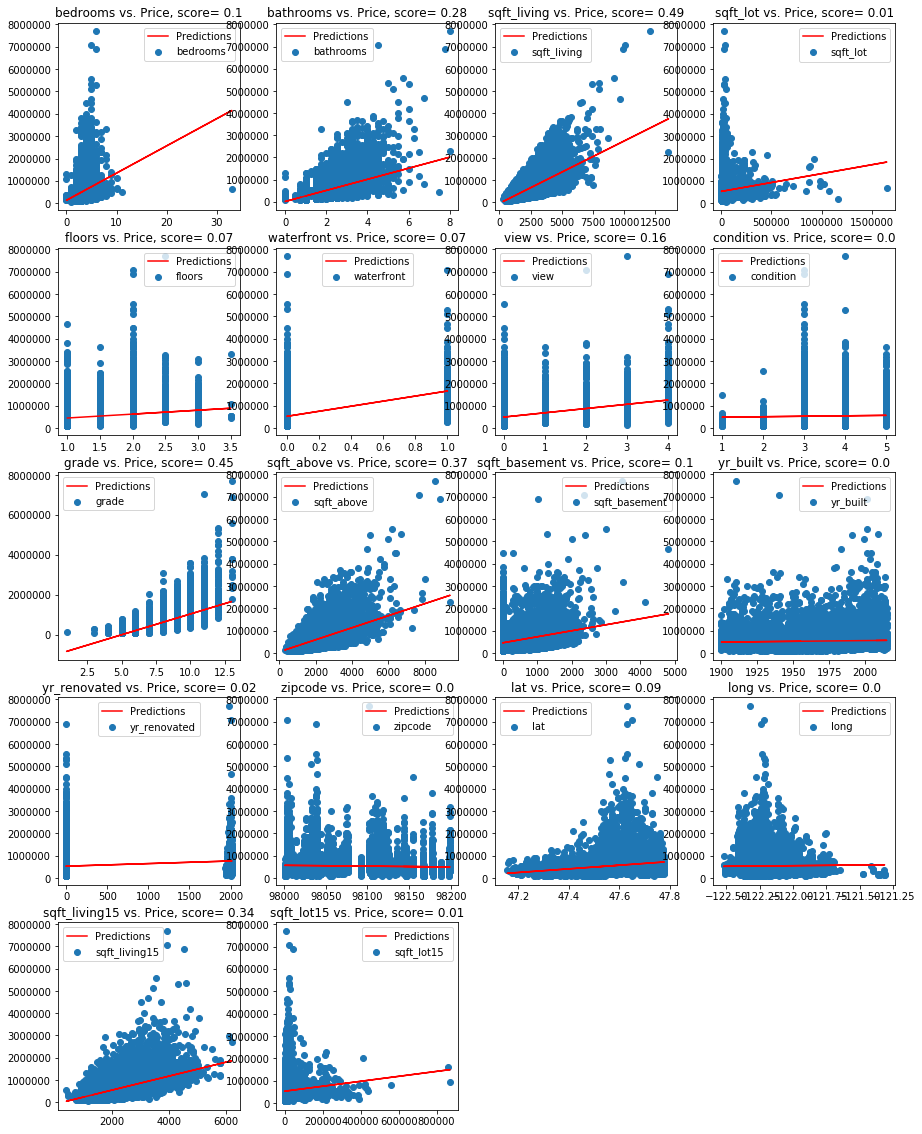

In [8]:
lr = LinearRegression()

#Iterate over features, fit the model, and plot chart for each one of them including "score".
plt.figure(figsize = (15, 20))
scores = pd.Series(index=X.columns, dtype='float64')
for index, feature in enumerate(X.columns):
    X_input = X[[feature]]
    lr.fit(X_input, y)
    preds = lr.predict(X_input)
    score = round(lr.score(X_input,y),2)
    plt.subplot(5, 4, index+1)
    plt.scatter(X_input, y, label = feature)
    plt.plot(X_input, preds, color = 'red', label = 'Predictions')
    plt.legend()
    plt.title(feature +' vs. Price, score= ' + str(score))
    scores[feature] = score

Observations:
* sqft_living, sqft_above, grade, sqft_living15 with strong positive correlations
* zipcode with 0 correlation to price

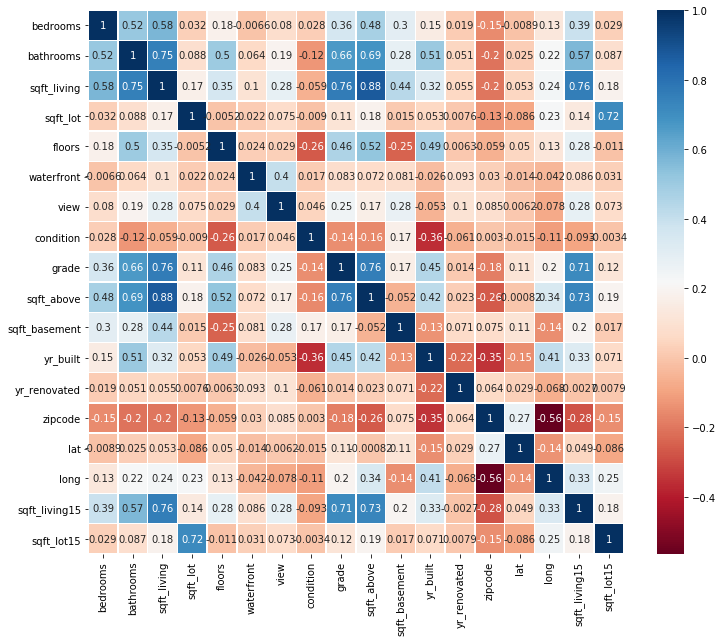

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), linewidth=0.5,cmap="RdBu", annot=True); 

Observations:
- sqft_living and sqft_above is basically the same
- Longitude and zip code strongly correlated
- grade and sqft_above are positively correlated. So: Small houses with less rooms tend to be of worse grade and vice versa

In [10]:
# Naive model with all non-categorial parameters
X =  pd.get_dummies(X, columns = ['zipcode','waterfront', 'view','condition','grade'],drop_first=True)
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

0.83594


* The zipcode as dummies added a lot of value. 
* In a former version this was deleted and the other dummies added little value. I think because the categorical variables are already meaningful by their magnitudes. The higher the value of the category, the "better".

In [11]:
# One more idea: Generate new features
# Square feet / room
X["sqft/room"]=df.sqft_living/(X.bedrooms+X.bathrooms)
X["sqft/room"].replace(np.inf,X["sqft/room"].median(),inplace=True)
print(X["sqft/room"].median())
X["sqft/room"].describe()

354.0


count    21613.000000
mean       372.866003
std        103.508990
min         46.618705
25%        298.947368
50%        354.000000
75%        428.000000
max       1824.000000
Name: sqft/room, dtype: float64

In [12]:
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

0.83777


This added very little value.

Let's improve the data:
1) yr-renovated
2) sqft_basement
3) check outliers

In [13]:
# Step 1: Year renovated
X.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# Idea 1: Make a dummy variable out of it

# Saving original column for other trials first
renovated=X.yr_renovated

# now make dummy

filter=(X["yr_renovated"]!=0)
X.loc[filter,"yr_renovated"]=1

In [15]:
X.yr_renovated.value_counts()

0    20699
1      914
Name: yr_renovated, dtype: int64

Lets see if it improved the model

In [16]:
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

0.83776


actually it got slightly worse ;-)

In [17]:
# Idea 2: Let's see if it improves if I put renovated = build in case of zero

# At first restore original column:
X.yr_renovated=renovated

filter=(X.yr_renovated==0)

X.loc[filter,"yr_renovated"]=X.loc[filter,"yr_built"]

In [18]:
lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

0.83776


Even worse :-)
So lets delete it

In [19]:
#Only ~5% of data has yr_renovated
X.drop("yr_renovated",axis=1, inplace=True)

lr.fit(X,y)
preds = lr.predict(X)
score = round(lr.score(X,y),5)
print(score)

0.83698


2) Sqft basement

In [20]:
X.sqft_basement.value_counts()

0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

More than half of the data does not have this data.
What would be a good replacement for "zero"?
Oh not. It is correct. It just means there is no basement

Step 3: Check for outliers

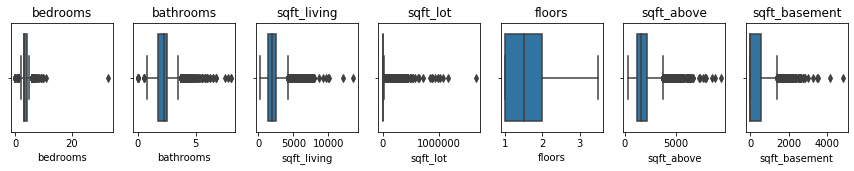

In [21]:
plt.figure(figsize = (15, 2))
features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']
i=0
for item in features:
    i+=1
    plt.subplot(1, 7, i)
    sns.boxplot(X[item])  
    plt.title(item)

- One property with 30+ bedrooms
- sqft_lot very right skewed

Might be a good idea to cap the extreme values as anyway such properties follow an inherently different pricing logic than "mass market" properties. But not for now.

# Week 2: Ridge Regression

In [22]:
# Train test split
from sklearn.model_selection import train_test_split

# 70% train, 30% test - random state for replication if so wished
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=101)

In [23]:
# Before ridge, lets replicate linear regression from before and test on test-set as baseline
lr.fit(X_train,y_train)

score_train_set = round(lr.score(X_train,y_train),5) 
score_test_set = round(lr.score(X_test,y_test),5)
print("Train set accuracy:",score_train_set)
print("Test set accuracy:", score_test_set)

Train set accuracy: 0.83223
Test set accuracy: 0.8455


That is actually really nice. Performance on test is (slightly) better than on train!

In [24]:
# Now lets do a ridge regression (by design without normalization yet to see the effect)
from sklearn.linear_model import Ridge 

model = Ridge(alpha = 1.0) #1.0 is the standard setting of sklearn, therefore I left it but wanted to state it directly
model.fit(X_train, y_train) 

score_train_set = round(model.score(X_train,y_train),5) 
score_test_set = round(model.score(X_test,y_test),5)
print("Train set accuracy:",score_train_set)
print("Test set accuracy:", score_test_set)

Train set accuracy: 0.83189
Test set accuracy: 0.84509


Didn't improve the performance, maybe due to alpha, maybe due to scaling

In [25]:
# Now lets normalize the data to see how it improves
from sklearn.preprocessing import StandardScaler 

# scaling the inputs 

scaler = StandardScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)
scaled_y_train = pd.DataFrame(scaler.fit_transform(y_train),columns = y_train.columns)
scaled_y_test = pd.DataFrame(scaler.fit_transform(y_test),columns = y_test.columns)

In [26]:
# Sneak Peak
scaled_X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,lat,long,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,sqft/room
0,-0.406622,0.497610,-0.173975,-0.248364,0.932005,0.158094,-0.657950,0.506838,1.120483,0.066411,...,-0.103059,-0.321716,-0.847023,1.604651,-0.372448,-0.235035,-0.134799,-0.063626,-0.023001,-0.228251
1,0.695256,0.497610,0.592589,-0.160309,0.932005,1.006666,-0.657950,0.676400,-0.896669,0.385175,...,-0.103059,-0.321716,-0.847023,-0.623188,2.684939,-0.235035,-0.134799,-0.063626,-0.023001,0.294012
2,-0.406622,0.497610,-0.535355,-0.258568,0.932005,-0.241948,-0.657950,0.676400,0.364865,-0.564032,...,-0.103059,-0.321716,1.180605,-0.623188,-0.372448,-0.235035,-0.134799,-0.063626,-0.023001,-0.808693
3,1.797134,0.822289,0.504981,-0.237047,-0.919279,-0.302560,1.616477,-0.544445,-0.002087,-0.613617,...,-0.103059,-0.321716,-0.847023,1.604651,-0.372448,-0.235035,-0.134799,-0.063626,-0.023001,-0.434781
4,0.695256,0.497610,1.917649,-0.075871,-0.919279,0.703605,2.662713,0.337276,1.308663,-0.500279,...,-0.103059,-0.321716,-0.847023,-0.623188,-0.372448,-0.235035,7.418445,-0.063626,-0.023001,2.094870


Dummy variables are now interesting I notice. But according to the following discussion it is not bad for the model / the following estimates per se: https://www.quora.com/How-bad-is-it-to-standardize-dummy-variables

Only drawbacks: More computational power needed and the interpretation is not as clear as "0" or "1", could lead to "sloppy thinking" as one discutant phrases it.

In [27]:
# Now once again, this time with normalized features
model = Ridge(alpha = 1.0) #1.0 is the standard setting of sklearn, therefore I left it but wanted to state it directly
model.fit(scaled_X_train, scaled_y_train) 

score_train_set = round(model.score(scaled_X_train,scaled_y_train),5) 
score_test_set = round(model.score(scaled_X_test,scaled_y_test),5)
print("Train set accuracy:",score_train_set)
print("Test set accuracy:", score_test_set)

Train set accuracy: 0.83223
Test set accuracy: 0.84544


Slighty better on train, slightly worse on test. So in this case not a big issue. I still think that the dataset per se is not very meaningful / interesting. Not enough diverse, i.e. uncorrelated features.

But before I look for a more interesting dataset let's build a parameter grid-search for alpha with k-fold validation.

I like the schema shown in the sklearn documentation: https://scikit-learn.org/stable/modules/cross_validation.html

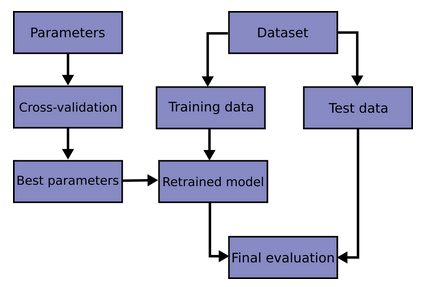

In [28]:
# There is a special class for this: RidgeCV has CV build-in
from sklearn.linear_model import RidgeCV

values=np.linspace(0,100,num=100) # alphas values to try, I tried a bit around

model=RidgeCV(alphas=values, cv=10) # using k-fold validation
model.fit(scaled_X_train, scaled_y_train)
model.score(scaled_X_test, scaled_y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.3362e-17): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.24694e-18): result may not be accurate.
  overwrite_a=True).T
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.35114e-17): result may not be accurate.
  overwrite_a=True).T


0.8456520982021214

In [29]:
model.alpha_

32.323232323232325

Only very slightly better than the standard alpha value of 1 from my first ridge model.

Ok: For next iteration let's look for a more interesting dataset.

Lets look at the weights from aboves ridge regression model

In [30]:
table={}
i=0
for item in X_train.columns:
    table[item]=round(model.coef_[0][i],2)
    i+=1

In [31]:
print(sorted(table.items(), key=lambda x: x[1], reverse=True))

# I am sure there is way nicer code to show this. Any hint/pointer is appreciated.

[('sqft_living', 0.31), ('sqft_above', 0.29), ('zipcode_98004', 0.21), ('lat', 0.15), ('zipcode_98039', 0.15), ('zipcode_98112', 0.15), ('waterfront_1', 0.14), ('grade_11', 0.13), ('zipcode_98040', 0.12), ('grade_12', 0.11), ('grade_13', 0.11), ('sqft_basement', 0.1), ('view_4', 0.1), ('grade_10', 0.1), ('zipcode_98105', 0.09), ('zipcode_98119', 0.09), ('zipcode_98033', 0.08), ('condition_5', 0.08), ('zipcode_98102', 0.07), ('zipcode_98103', 0.07), ('zipcode_98109', 0.07), ('zipcode_98115', 0.07), ('zipcode_98122', 0.07), ('zipcode_98199', 0.07), ('condition_4', 0.07), ('zipcode_98006', 0.06), ('zipcode_98117', 0.06), ('view_3', 0.06), ('zipcode_98005', 0.05), ('zipcode_98008', 0.05), ('zipcode_98029', 0.05), ('zipcode_98052', 0.05), ('zipcode_98107', 0.05), ('zipcode_98116', 0.05), ('zipcode_98144', 0.05), ('condition_3', 0.05), ('grade_9', 0.05), ('zipcode_98027', 0.04), ('zipcode_98136', 0.04), ('view_2', 0.04), ('sqft_lot', 0.03), ('sqft_living15', 0.03), ('zipcode_98007', 0.03), (

Some coefficients look funny: 
- Lat is positive whereas long is negative, but it may be that neighbourhoods into a direction are "better" or "worse"
- Bedrooms is negative (Maybe this indicates "families" as target groups which are more price-sensitive)
- sqft/room strongest negative

Other observations:
- Very strong neighborhoods, eg Bellevue in Seattle: (Saying in real estate: "It is all about location, location, location) https://www.google.de/maps/place/Bellevue,+Washington+98004,+USA/@47.6205721,-122.2816381,12z/data=!3m1!4b1!4m5!3m4!1s0x54906c86648f1ab3:0x70905fed96b53f84!8m2!3d47.6264794!4d-122.2051488

Lets see a Lasso-regularization on this, by now well known, dataset

In [32]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=0)
lasso.fit(scaled_X_train, scaled_y_train)
lasso.score(scaled_X_test, scaled_y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8456873800455115

Didn't change anything.

In [33]:
table={}
i=0
for item in X.columns:
    table[item]=round(lasso.coef_[i],2)
    i+=1
print(sorted(table.items(), key=lambda x: x[1], reverse=True))

[('sqft_living', 0.49), ('zipcode_98004', 0.2), ('lat', 0.19), ('zipcode_98039', 0.14), ('zipcode_98112', 0.14), ('waterfront_1', 0.14), ('grade_11', 0.14), ('grade_10', 0.12), ('grade_12', 0.12), ('grade_13', 0.12), ('sqft_above', 0.11), ('zipcode_98040', 0.11), ('view_4', 0.1), ('zipcode_98105', 0.08), ('zipcode_98119', 0.08), ('zipcode_98109', 0.07), ('zipcode_98199', 0.07), ('grade_9', 0.07), ('zipcode_98033', 0.06), ('zipcode_98102', 0.06), ('zipcode_98103', 0.06), ('zipcode_98115', 0.06), ('zipcode_98122', 0.06), ('view_3', 0.06), ('zipcode_98006', 0.05), ('zipcode_98117', 0.05), ('condition_5', 0.05), ('zipcode_98005', 0.04), ('zipcode_98107', 0.04), ('zipcode_98116', 0.04), ('zipcode_98144', 0.04), ('view_2', 0.04), ('sqft_lot', 0.03), ('sqft_living15', 0.03), ('zipcode_98008', 0.03), ('zipcode_98029', 0.03), ('zipcode_98136', 0.03), ('view_1', 0.03), ('condition_4', 0.03), ('zipcode_98007', 0.02), ('zipcode_98027', 0.02), ('zipcode_98052', 0.02), ('zipcode_98126', 0.02), ('zip

Looks a bit more meaningful!

Sqft_living strongest indicator by far, then "lat" and whether or not high "grades" of house.